In [23]:
import torch

# import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

print(torch.__version__)

2.5.1+cu124


# Fast CNN implementation 

+ Convert image into a matrix with certain shape
+ Reshape our kernel (flatten)
+ Multiply by kernel


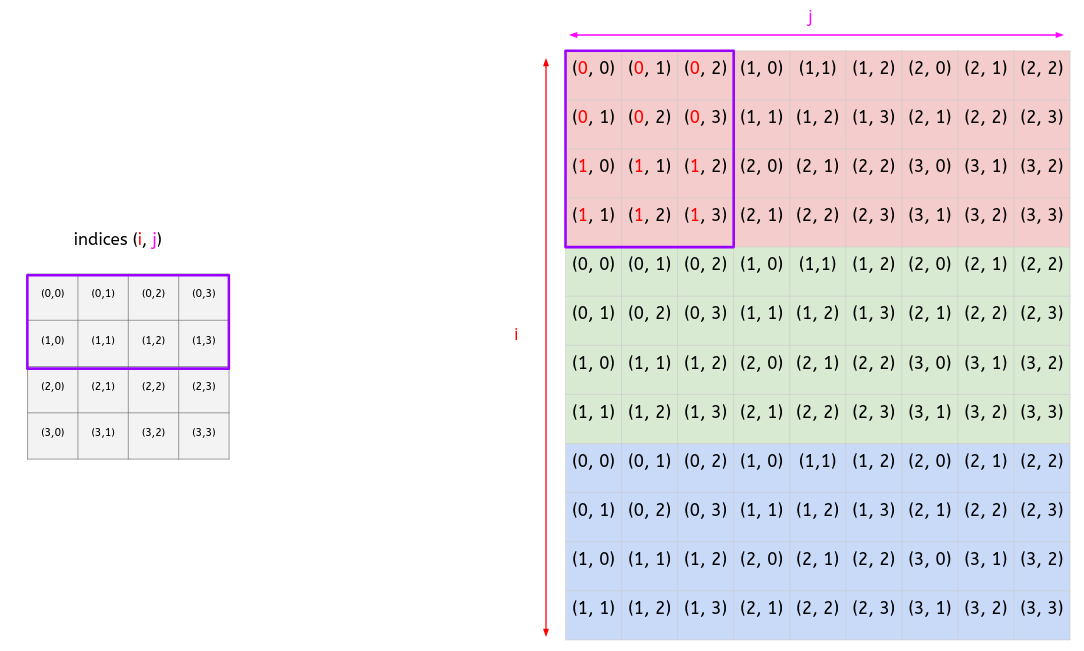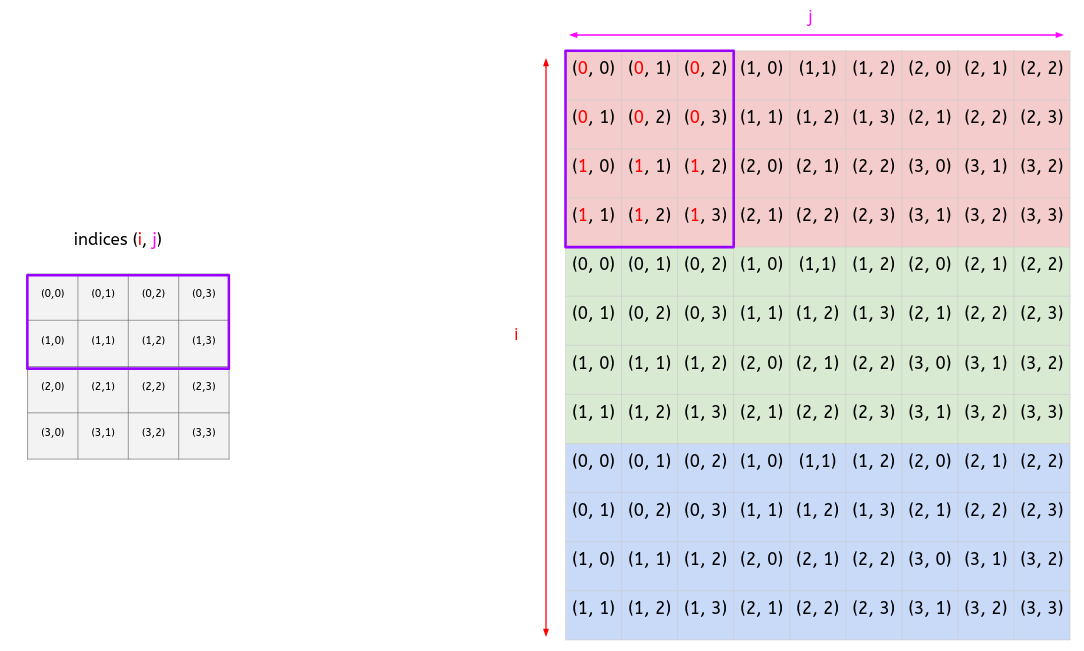

In [24]:
x = torch.arange(16, dtype=torch.float32).reshape(4, 4)

In [25]:
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])

In [26]:
mask = torch.tensor([1/4, 1/4, 1/4, 1/4]).reshape(2, 2)

In [27]:
mask

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

In [28]:
import numpy as np

# Compute i

In [3]:
# get output size
out_h = int((4  - 2)) + 1
out_w = int((4  - 2)) + 1

In [6]:
level1 = np.repeat(np.arange(2), 2)

In [7]:
level1

array([0, 0, 1, 1])

In [8]:
everyLevels = np.repeat(np.arange(out_h), out_w)

In [9]:
everyLevels

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [10]:
level1.reshape(-1, 1)

array([[0],
       [0],
       [1],
       [1]])

In [29]:
i = level1.reshape(-1, 1) + everyLevels.reshape(1, -1)

In [30]:
i

array([[0, 0, 0, 1, 1, 1, 2, 2, 2],
       [0, 0, 0, 1, 1, 1, 2, 2, 2],
       [1, 1, 1, 2, 2, 2, 3, 3, 3],
       [1, 1, 1, 2, 2, 2, 3, 3, 3]])

# Compute j 

At level 1, there is a total of n-k slides.

+ For slide 1, we have a $[\underbrace{0,1,...,k-1,...,0,1,...,k-1}_{k}]$  vector.
+ For slide 2, we have a $[\underbrace{1,2,...,k,...,1,2,...,k}_{k}]$
+ ...
+ For slide n-k, we have a $[\underbrace{n-k,n-k+1,...,n-1,...,n-k,n-k+1,...,n-1}_{k}]$ vector
 


In [31]:
slide1 = np.tile(np.arange(2), 2)

In [32]:
slide1


array([0, 1, 0, 1])

In [33]:
slide1 = np.tile(slide1, 1)

In [34]:
slide1

array([0, 1, 0, 1])

In [35]:
everySlides = np.tile(np.arange(out_w), out_h)

In [36]:
everySlides

array([0, 1, 2, 0, 1, 2, 0, 1, 2])

In [37]:
j = slide1.reshape(-1, 1) + everySlides.reshape(1, -1)

In [38]:
j

array([[0, 1, 2, 0, 1, 2, 0, 1, 2],
       [1, 2, 3, 1, 2, 3, 1, 2, 3],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [1, 2, 3, 1, 2, 3, 1, 2, 3]])

In [39]:
d = np.repeat(np.arange(1), 2 * 2).reshape(-1, 1)

In [40]:
d

array([[0],
       [0],
       [0],
       [0]])

In [41]:
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])

In [42]:
i

array([[0, 0, 0, 1, 1, 1, 2, 2, 2],
       [0, 0, 0, 1, 1, 1, 2, 2, 2],
       [1, 1, 1, 2, 2, 2, 3, 3, 3],
       [1, 1, 1, 2, 2, 2, 3, 3, 3]])

In [43]:
j

array([[0, 1, 2, 0, 1, 2, 0, 1, 2],
       [1, 2, 3, 1, 2, 3, 1, 2, 3],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [1, 2, 3, 1, 2, 3, 1, 2, 3]])

In [44]:
cols = x[i, j]

In [45]:
cols

tensor([[ 0.,  1.,  2.,  4.,  5.,  6.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  5.,  6.,  7.,  9., 10., 11.],
        [ 4.,  5.,  6.,  8.,  9., 10., 12., 13., 14.],
        [ 5.,  6.,  7.,  9., 10., 11., 13., 14., 15.]])

# Flatten the kernel

In [46]:
w_col = mask.reshape((1, 4))

In [47]:
w_col 

tensor([[0.2500, 0.2500, 0.2500, 0.2500]])

In [48]:
out = w_col @ cols

In [49]:
out.shape

torch.Size([1, 9])

In [50]:
out = out.reshape((out_w, out_h))

In [51]:
out

tensor([[ 2.5000,  3.5000,  4.5000],
        [ 6.5000,  7.5000,  8.5000],
        [10.5000, 11.5000, 12.5000]])